# Clustering

In this notebook we will code and use different clustering techniques. The objective is to learn how to use them and understand the effects of different parameters. 

We will test:

- kMeans
- hierarchical clustering
- DBscan

In [1]:
# libraries 

import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4, suppress=True)

# Generate random data

We're going to generate random data normally distributed around three centers, with noise. We will test the algorithms on this data.

In [2]:
NPOINTSPERCLUSTER = 200

In [3]:
# Set three centers
center_1 = np.array([0,0])
center_2 = np.array([3,4])
center_3 = np.array([6,1])

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_2
data_3 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
print(data.shape)

data[0:10]

(600, 2)


array([[-1.0343, -0.7395],
       [ 0.8742,  0.0576],
       [ 0.1977,  0.131 ],
       [ 1.3444, -2.1936],
       [ 0.1584, -0.5846],
       [ 0.7847,  0.964 ],
       [ 0.7862, -1.0656],
       [ 0.4987,  0.1228],
       [-0.8051,  0.1366],
       [ 0.27  ,  0.2623]])

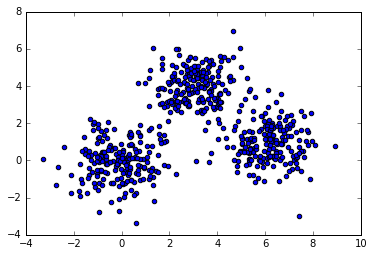

In [4]:
plt.scatter(data[:,0], data[:,1]); #s=size

Let's add some color so we see from which cluster every point is generated from. 

In [5]:
original_groups = np.concatenate((np.repeat(0, NPOINTSPERCLUSTER), 
                                  np.repeat(1, NPOINTSPERCLUSTER), 
                                  np.repeat(2, NPOINTSPERCLUSTER)))
original_groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

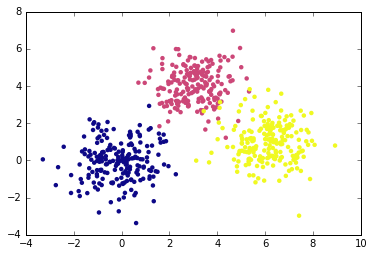

In [6]:
plt.scatter(data[:,0], data[:,1], c=original_groups, cmap="plasma", linewidths=0);

# Implementation of K-Means

In this section we will implement kmeans algorithm. 


## Algorithm

```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

### Exercise 1: complete the following code so that it follows k-means algorithm

- Assume data is a a (Npoints, dim) numpy array. 
- Hint: use `numpy.linalg.norm()` to compute euclidean distance
- Hint: `amin` and `amax` functions may be useful

In [7]:
def kmeans (data, K):
    
    N = data.shape[0]
    dim = data.shape[1]
    
    # compute min and max data to generate random centroids inside
    #min_ = np.amin(data, axis=0)
    #max_ = np.amax(data, axis=0)
    # generate K random centroids
    #centroids = np.random.uniform(low=min_, high=max_, size=(K, dim))
    
    # take K random points as centroids
    #centroids = random.choices(data, k=K) # python3
    centroids = random.sample(data, K) #python2
    
    
    # initialize vectors
    new_centroids = np.zeros((K, dim))
    distances = np.zeros((N, K))
    
    # repeat until convergence
    niter = 1
    while True:
        
        # compute distance of each point to cluster centroid
        for i in range(K):
            distances[:,i] = np.linalg.norm(data-centroids[i], axis=1)
            
        # assign points to closest centroid
        clusters = np.argmin(distances, axis=1)
        
        # recompute clusters' centroids
        
        # Calculate mean for every cluster and update the center
        for i in range(K):
            new_centroids[i] = np.mean(data[clusters == i], axis=0)
            
        
        # compute if there is any variation
        if np.array_equal(centroids, new_centroids):
            break
            
        centroids = new_centroids.copy()
        niter+=1
        #print(niter)
        
    return clusters, centroids

In [8]:
# let's try our algorithm
K = 3
clusters, centroids = kmeans(data, K)

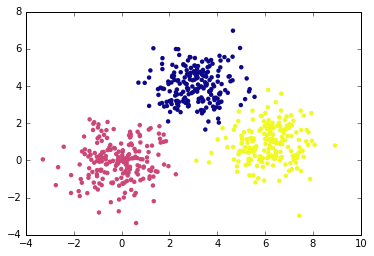

In [9]:
plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0);

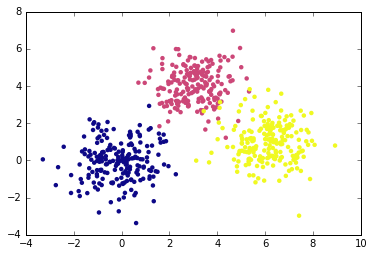

In [10]:
# comparison to original distribution where data came from
plt.scatter(data[:,0], data[:,1], c=original_groups, cmap="plasma", linewidths=0);

In [11]:
# comparison to original distribution where data came from
# we create a df with the clusters and compute the 'confussion' matrix

df = pd.DataFrame({'original' : original_groups, 'kmeans': clusters})
df.groupby(['original', 'kmeans']).size().reset_index(name='n')\
    .pivot(index='original', columns='kmeans', values='n').fillna(0)

kmeans,0,1,2
original,,,
0,1.0,199.0,0.0
1,197.0,1.0,2.0
2,8.0,0.0,192.0


Let's use built-in function to compute agreement.

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(original_groups, clusters)

0.32333333333333331

In [13]:
mapping = {0:1, 1:0, 2:2}
print(original_groups[0:10])
print(clusters[0:10])
print([mapping[c] for c in clusters][0:10])

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
accuracy_score(original_groups, [mapping[c] for c in clusters])

0.97999999999999998

### Exercise 2: Add cluster centroid to the plot

Hint: use marker 'D' (diamond) and a high size so that it is visible on top of the points.

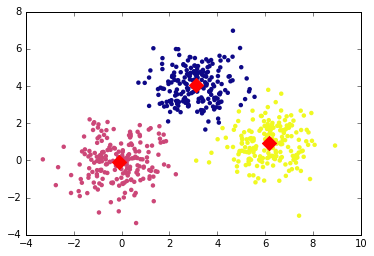

In [15]:
# solution
plt.scatter(data[:,0], data[:,1], c=clusters, cmap='plasma', linewidths=0);
for k in range(K):
    plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')

### Exercise 3: modify k-means function so that we can see the cluster assignation after each iteration

Notes: 
- in notebooks it's not straightforward to see the 'animation' effect; so just plot one figure below each other.
- we add a `plot` parameter so we can decide wether to plot or not

In [16]:

## This is an enhanced version to handle clusters with no points assigned
## We control that so that no NaNs are produced

def kmeans (data, K, plot=False, debug=False):
    N = data.shape[0]
    dim = data.shape[1]

    # compute min and max data to generate random centroids inside
    min_ = np.amin(data, axis=0)
    max_ = np.amax(data, axis=0)

    # generate K random centroids
    centroids = np.random.uniform(low=min_, high=max_, size=(K, dim))

    # initialize vectors
    new_centroids = np.zeros((K, dim))
    distances = np.zeros((N, K))

    # repeat until convergence
    niter = 1

    while True:

        # compute distance of each point to cluster centroid
        for i in range(K):
            distances[:,i] = np.linalg.norm(data-centroids[i], axis=1)

        # assign points to closest centroid
        clusters = np.argmin(distances, axis=1)

        # recompute clusters' centroids
        # Calculate mean for every cluster and update the center
        for i in range(K):
            new_centroids[i] = np.mean(data[clusters == i], axis=0)
            
            # if a cluster has no point assigned, we just copy it
            if np.isnan(new_centroids[i,0]):
                new_centroids[i] = centroids[i]
            
        if debug:
            print('Distances: {}'.format(distances[0:20,:]))
            print('Cluster assignation: {}'.format(np.unique(clusters, return_counts = True)))
            print('Head clusters: {}'.format(clusters[0:20]))
            print('New centroids: {}'.format(new_centroids))

        if plot:
            plt.figure(figsize=(8,4))
            plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)

            for k in range(K):
                plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
            plt.title("Iter {}".format(niter))
            plt.show()
            
        # compute if there is any variation
        # this condition could be more robust, as seen in class
        if np.array_equal(centroids, new_centroids) or niter > 50:
            break

        centroids = new_centroids.copy()

        niter+=1
        #print(niter)

        
    return clusters, centroids

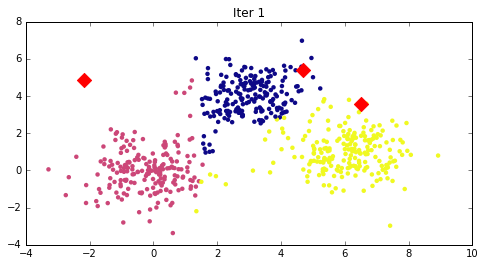

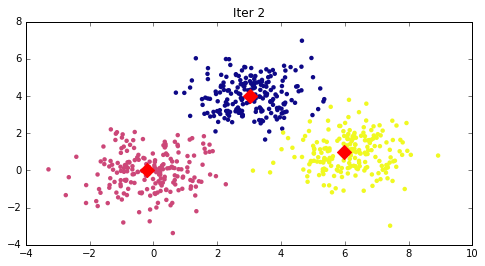

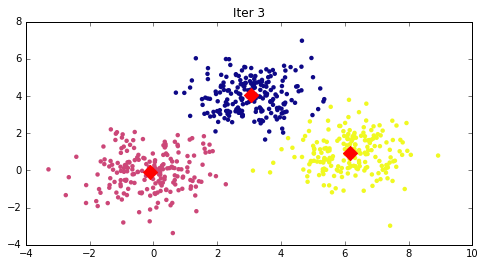

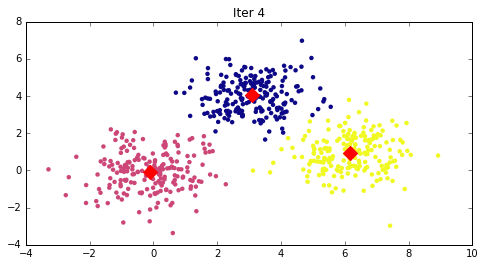

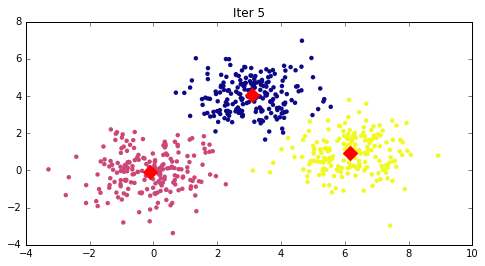

In [17]:
K = 3
clusters, centroids = kmeans(data, K, plot=True)

### Exercise 4: Take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

15 minutes. 

In [ ]:
# Set three centers
center_1 = np.array([0,0])
center_2 = ...
center_3 = ...
...

# Generate random data around the three centers
data_1 = np.random.randn(NPOINTSPERCLUSTER, 2) + center_1
data_2 = ...
... 

data = np.concatenate((data_1, data_2, ...), axis = 0)

k = ...
kmeans(data, k)

## Computing how good the cluster partition is

Remember SSE (Sum of Squared Error):
$$
SSE = \sum_{i=1}^N (x_i - C_{(X_i)})^2
$$
where $C_{(X_i)}$ represents the cluster centroid of $X_i$.



### Exercise 5: complete SSE function and compute clustering metrics for different number of clusters

In [18]:
def sse(data, clusters, centroids):
    return np.sum(np.square(np.linalg.norm(data - centroids[clusters], axis=1)))

In [19]:
ks = range(1, 20)
sse_errors = np.zeros(len(ks))

for i, k in enumerate(ks):
    
    # podeis añadir plot=True o debug=True para entender si está haciendo cosas raras
    clusters_, centroids_ = kmeans(data, k)
    
    sse_errors[i] = sse(data, clusters_, centroids_)
    print(k, sse_errors[i])
    
    #if np.isnan(sse_errors[i]):
    #    print(clusters_)
    #    print(centroids_)

(1, 6871.3475658681673)
(2, 3028.113396278296)
(3, 1113.6001749941613)
(4, 979.91748609671936)
(5, 862.0870561244576)
(6, 891.77246706576011)
(7, 738.01599314874909)
(8, 726.57279568678814)
(9, 553.38141922050511)
(10, 457.35819313318825)
(11, 419.60889310534708)
(12, 409.58682332002172)
(13, 367.51082975936191)
(14, 450.98617661805122)
(15, 365.60673131227259)
(16, 316.09444506696889)
(17, 316.91713170503613)
(18, 313.26822501704999)
(19, 323.98214372616127)


//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


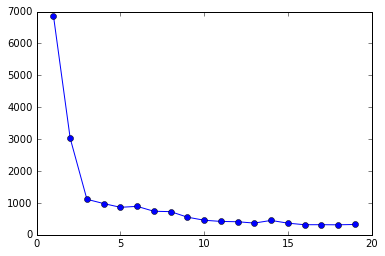

In [20]:
plt.plot(ks, sse_errors, 'o-');

# scikit-learn K-means

Now we are going to use scikit-learn library for our exercise

KMeans works as other models in sklearn:

- define the model (and parameters)
- fit the model on training dataset
- apply the fitted model on another dataset (can be the same dataset)

In [21]:
from sklearn.cluster import KMeans

In [22]:
# inspect help
?KMeans

In [23]:
# define the model
model = KMeans(n_clusters = 3)

In [24]:
# fit the model on training data
model = model.fit(data)

In [25]:
# press tab to see available methods
#model. #press tab
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_) # sse

# compare to how data has been generated

[[ 3.0899  4.0295]
 [-0.1231 -0.0671]
 [ 6.1653  0.912 ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [26]:
# check inertia is our sse defined function
abs(model.inertia_ - sse(data, model.labels_, model.cluster_centers_)) < 0.01

True

In [27]:
# apply the fitted model 
# if applied to the same data, we get model.labels_
clusters_sk = model.predict(data)

In [28]:
all(model.labels_ == clusters_sk)

True

In [29]:
clusters_sk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0,

In [30]:
def plot_clustering(data, clusters, centroids = None):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1], c=clusters, cmap="plasma", linewidths=0)

    if centroids != None:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()

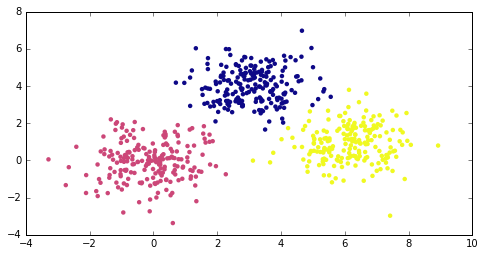

In [31]:
plot_clustering(data, clusters_sk)

In [32]:
# Centroid values
centroids_sk = model.cluster_centers_
centroids_sk

array([[ 3.0899,  4.0295],
       [-0.1231, -0.0671],
       [ 6.1653,  0.912 ]])

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


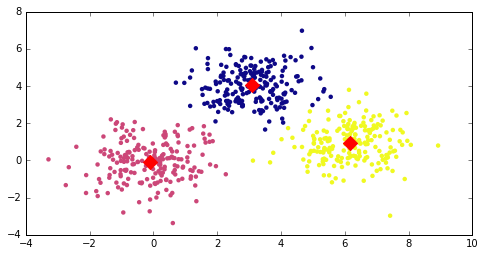

In [33]:
plot_clustering(data, clusters_sk, centroids_sk)

In [34]:
# compare with our implementation

print(centroids)
print(centroids_sk)

#plot_clustering(data, clusters, centroids)
#plot_clustering(data, clusters_sk, centroids_sk)

[[ 3.0899  4.0295]
 [-0.1231 -0.0671]
 [ 6.1653  0.912 ]]
[[ 3.0899  4.0295]
 [-0.1231 -0.0671]
 [ 6.1653  0.912 ]]


# Hierarchical Clustering

In this section we will learn how to apply Hierarchical Clustering in Python. 

We will use `scipy` package:

- `linkage` function computes the distance matrix between the points
- `dendrogram` function plots the dendrogram using the distances
- `fcluster` function performs a clustering assignment according to different parameters

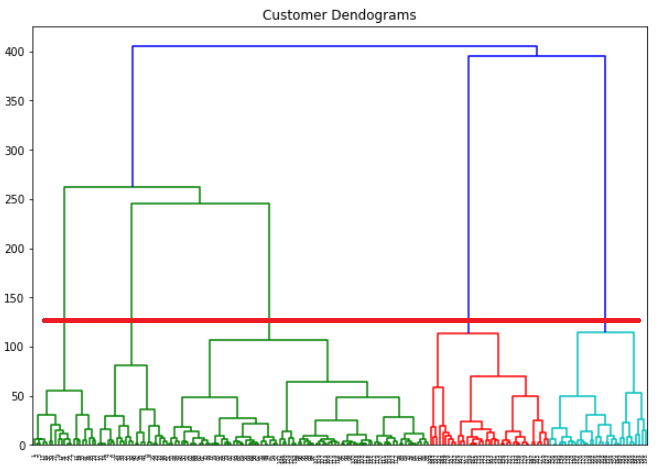

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [36]:
?linkage

In [37]:
Z = linkage(data, 'ward') #'single', 'ward', ...

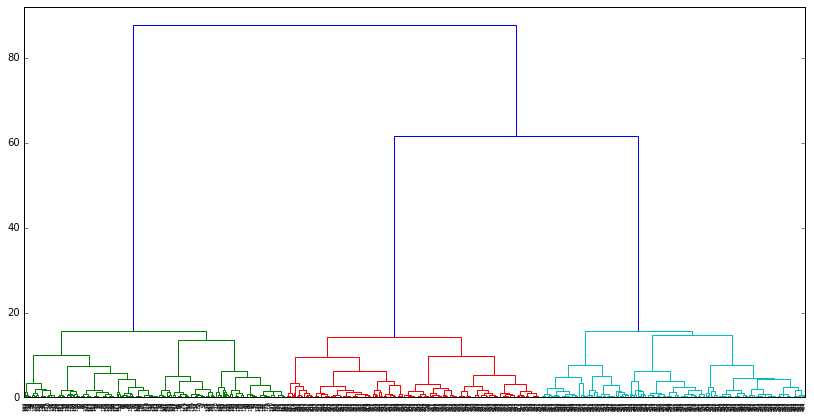

In [38]:
plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.show()

Now let's understand how the algorithm works. 

It follows an agglomerative approach, so *close* points are merged. 

`linkage` returns how points are merged at each iteration. The output is: [`id_node_1`, `id_node_2`, `distance`, `number_of_points_in_group`]

In [39]:
Z[0:20]

array([[ 454.    ,  588.    ,    0.0062,    2.    ],
       [ 314.    ,  331.    ,    0.0069,    2.    ],
       [ 240.    ,  256.    ,    0.008 ,    2.    ],
       [ 302.    ,  388.    ,    0.0109,    2.    ],
       [ 230.    ,  361.    ,    0.0111,    2.    ],
       [  69.    ,  100.    ,    0.0113,    2.    ],
       [ 445.    ,  529.    ,    0.0177,    2.    ],
       [ 137.    ,  156.    ,    0.0204,    2.    ],
       [ 479.    ,  549.    ,    0.0211,    2.    ],
       [ 249.    ,  260.    ,    0.0214,    2.    ],
       [ 104.    ,  165.    ,    0.0235,    2.    ],
       [ 555.    ,  594.    ,    0.0236,    2.    ],
       [  77.    ,   83.    ,    0.029 ,    2.    ],
       [ 332.    ,  343.    ,    0.0291,    2.    ],
       [ 211.    ,  319.    ,    0.0305,    2.    ],
       [ 252.    ,  380.    ,    0.0315,    2.    ],
       [ 353.    ,  369.    ,    0.0325,    2.    ],
       [ 141.    ,  163.    ,    0.033 ,    2.    ],
       [ 443.    ,  526.    ,    0.0331,    2.

In [40]:
# indices
np.where(Z[:,0] > data.shape[0])[0:20]

(array([ 77, 195, 212, 219, 231, 240, 241, 265, 273, 276, 281, 283, 286,
        287, 289, 290, 307, 318, 319, 321, 328, 332, 333, 334, 336, 339,
        340, 341, 342, 343, 345, 346, 347, 349, 350, 351, 353, 355, 359,
        362, 363, 364, 365, 366, 368, 371, 374, 380, 381, 383, 384, 387,
        388, 389, 391, 393, 394, 395, 397, 398, 401, 402, 404, 406, 407,
        409, 410, 411, 413, 414, 415, 416, 418, 419, 420, 422, 423, 426,
        428, 432, 433, 436, 437, 439, 440, 441, 442, 444, 445, 446, 448,
        449, 450, 452, 453, 455, 456, 457, 458, 459, 460, 461, 463, 464,
        465, 467, 468, 469, 472, 474, 475, 476, 477, 478, 479, 480, 481,
        483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495,
        496, 498, 499, 500, 501, 502, 503, 505, 506, 507, 508, 509, 510,
        511, 512, 515, 516, 522, 523, 524, 525, 526, 527, 528, 529, 530,
        531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 544,
        545, 546, 547, 548, 549, 550, 551, 552, 553

In [41]:
Z[Z[:,0] > data.shape[0]][0:20]

array([[ 601.    ,  604.    ,    0.0789,    4.    ],
       [ 675.    ,  695.    ,    0.1601,    4.    ],
       [ 614.    ,  702.    ,    0.1736,    5.    ],
       [ 622.    ,  719.    ,    0.1797,    4.    ],
       [ 680.    ,  718.    ,    0.1919,    5.    ],
       [ 631.    ,  716.    ,    0.2005,    4.    ],
       [ 664.    ,  699.    ,    0.2008,    5.    ],
       [ 746.    ,  842.    ,    0.2125,    5.    ],
       [ 603.    ,  812.    ,    0.2186,    7.    ],
       [ 606.    ,  665.    ,    0.223 ,    4.    ],
       [ 650.    ,  787.    ,    0.2259,    5.    ],
       [ 729.    ,  779.    ,    0.2275,    4.    ],
       [ 658.    ,  822.    ,    0.2289,    5.    ],
       [ 671.    ,  759.    ,    0.2329,    4.    ],
       [ 669.    ,  705.    ,    0.2338,    5.    ],
       [ 676.    ,  744.    ,    0.2347,    5.    ],
       [ 771.    ,  793.    ,    0.2596,    4.    ],
       [ 682.    ,  848.    ,    0.2715,    6.    ],
       [ 717.    ,  853.    ,    0.2751,    4.

### Exercise 6: dendrogram plotting options

Investigate dendrogram plotting options and play with them.

- p:
- truncate_mode: 'lastp', 'level'
- color_threshold
- orientation
- count_sort: False, 'ascending'/True, 'descendent'
- distance_sort: False, 'ascending'/True, 'descendent'
- show_leaf_counts: boolean (True)
- show_contracted: boolean (False)
- above_threshold_color = 'b'

In [42]:
#help(dendrogram)

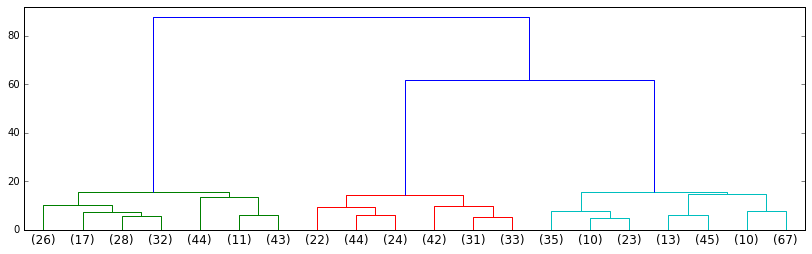

In [43]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, p = 20, truncate_mode = 'lastp')
plt.show()

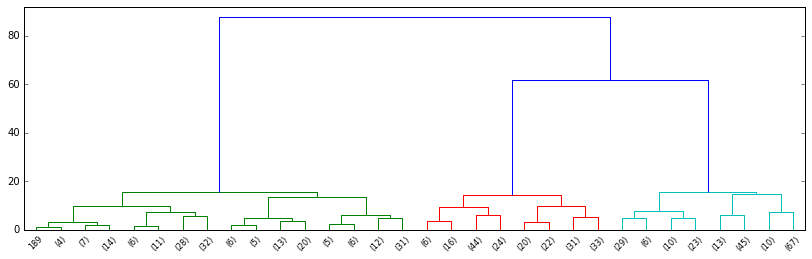

In [44]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, p = 4, truncate_mode = 'level')
plt.show()

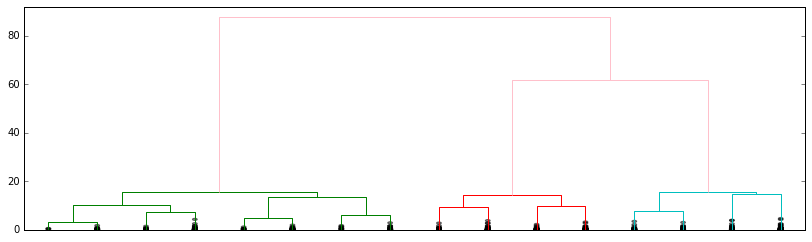

In [45]:
plt.figure(figsize=(14, 4))
dendrogram(Z, p = 3, truncate_mode = 'level',
           color_threshold=20, count_sort=False, show_leaf_counts=False, show_contracted=True, 
           above_threshold_color='pink')
plt.show()

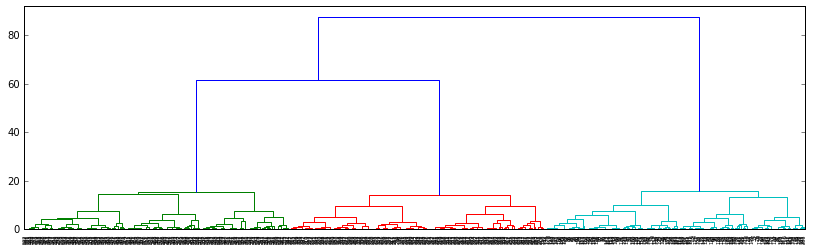

In [46]:
# exercise
plt.figure(figsize=(14, 4))
dendrogram(Z, color_threshold=20, count_sort='descending')
plt.show()

## Getting the cluster partition

In order to assign a cluster to each sample we first need to set the cut_off distance. We will visually explore what this value is and use it for partitioning. 

We then use function `fcluster` to perform the clustering.

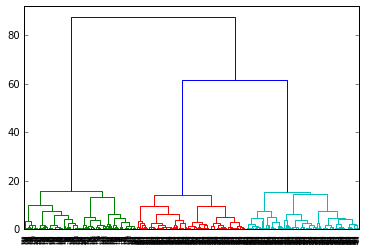

In [47]:
dendrogram(Z)
plt.show()

In [48]:
?fcluster

In [49]:
cut_distance = 25
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')

In [50]:
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3], dtype=int32), array([201, 196, 203]))

In [51]:
clusters_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2,

### Exercise 7: change cut_distance and see how the number of clusters change

It should match the dendrogram plotting

In [52]:
# exercise
cut_distance = 50
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3], dtype=int32), array([201, 196, 203]))

### Exercise 8: change `method` parameter in the linkage and observe the results

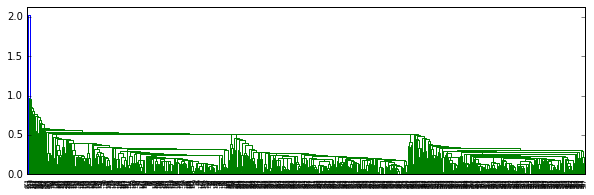

In [53]:
# To-Do
linked = linkage(data, 'single') #'single', 'ward', ...
plt.figure(figsize=(10, 3))
dendrogram(linked)
plt.show()

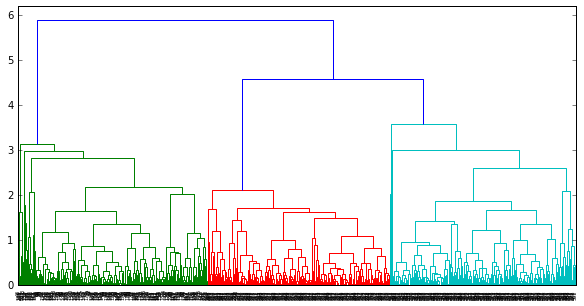

In [54]:
# To-do
linked = linkage(data, 'average') #'single', 'ward', 'complete', 'average'
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.show()

#### AgglomerativeClustering in scikit-learn

In order to perform the clustering partition, we can also use `AgglomerativeClustering` from `sklearn` once we have selected the desired number of clusters. 

In [55]:
from sklearn.cluster import AgglomerativeClustering

# define the model
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  

# fit data and predict 
clusters = cluster.fit_predict(data)

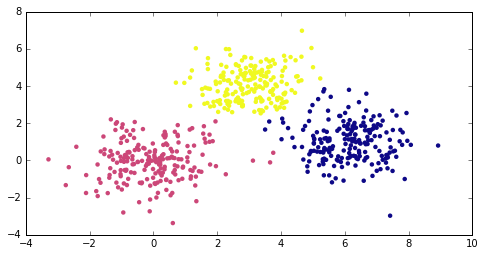

In [56]:
plot_clustering(data, clusters)

### Comparison kmeans and hierarchical

Now let's compare the result of both algorithms when the number of clusters is not optimal

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


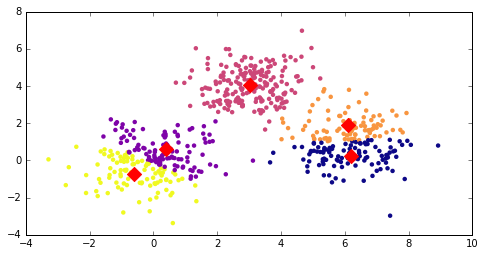

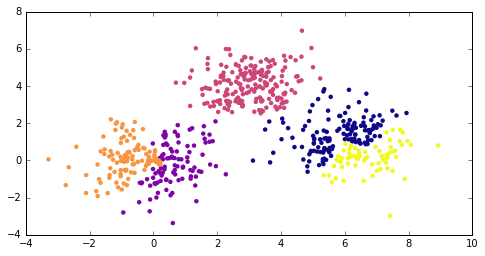

In [57]:
NCLUS = 5

km = KMeans(n_clusters=NCLUS)
clusters_km = km.fit_predict(data)
plot_clustering(data, clusters_km, km.cluster_centers_)

hier = AgglomerativeClustering(n_clusters=NCLUS, affinity='euclidean', linkage='ward')
clusters_hier = hier.fit_predict(data)
plot_clustering(data, clusters_hier)

# DBSCAN

In this section we will learn how DBscan algorithm works and what's the effect of its parameters in the clustering result. 

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
dbs = DBSCAN(eps=0.4, min_samples=5)
dbs = dbs.fit(data)

In [60]:
dbs.labels_[0:50]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0])

In [61]:
id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 5 clusters


(array([-1,  0,  1,  2,  3]), array([ 91, 165,   6, 175, 163]))

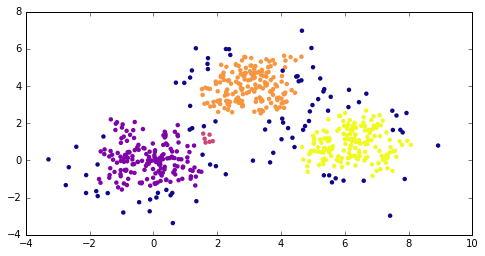

In [62]:
plot_clustering(data, dbs.labels_)

### Exercise 9 : play with the parameters `eps` and `min_samples` and see how it affects the clustering partition
10 min

In [ ]:
# exercise
dbs = DBSCAN(eps=..., min_samples=...)
dbs = dbs.fit(data)
plot_clustering(data, dbs.labels_)

# New data : non-convex datasets

Now we will apply DBscan on non convex data to see the differences with k-means. We will also learn how to load already-predefined datasets from `sklearn`

In [63]:
from sklearn import datasets
nsamples = 1000

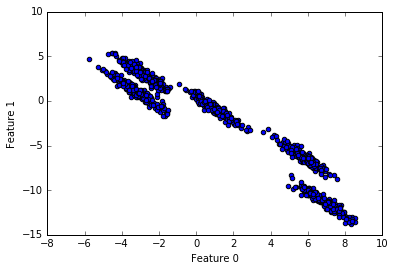

In [64]:
# make_blobs
# this creates 'centers' circles
# we will change the covariance so that the clusters become ellipses

X, y = datasets.make_blobs(random_state=170, n_samples=nsamples, centers = 5)
transformation = np.random.RandomState(74).normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Compare DBscan against Kmeans on that data

In [65]:
from sklearn.cluster import KMeans

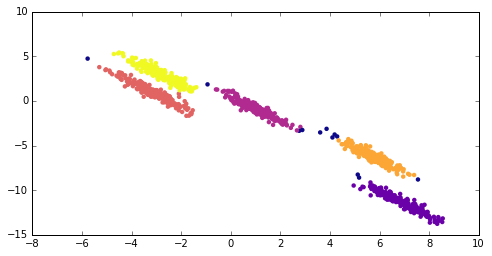

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


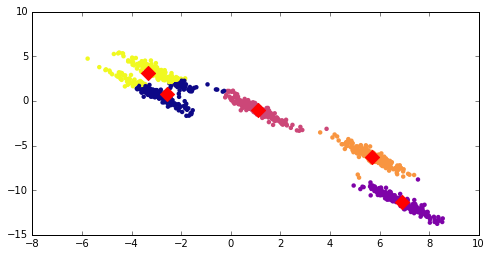

In [66]:
dbscan_model = DBSCAN(eps=0.4, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 5)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

In [67]:
# Exercise: test other datasets
# datasets.make_circles
# datasets.make_moons
# datasets.make_s_curve (Hint: use dimensions 0 and 2 of the generated dataset)
# datasets.make_swiss_roll (Hint: use dimensions 0 and 2 of the generated dataset)

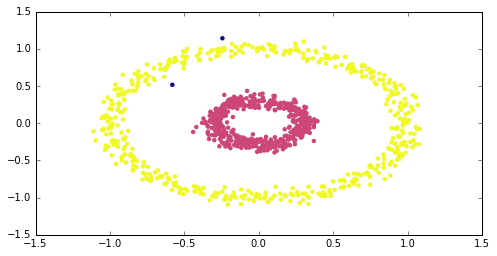

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


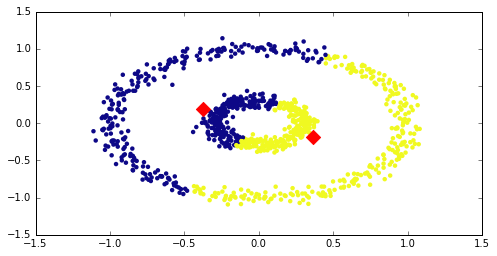

In [68]:
# make_circles
X, y = datasets.make_circles(n_samples = nsamples, noise=0.05, factor=0.3)

dbscan_model = DBSCAN(eps=0.1, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 2)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

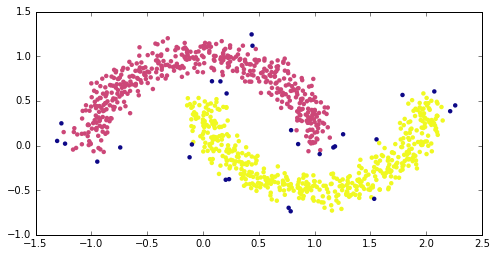

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


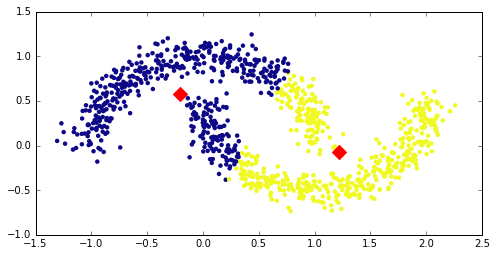

In [69]:
# make_moons
X, y = datasets.make_moons(n_samples = nsamples, noise=0.1)

dbscan_model = DBSCAN(eps=0.1, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 2)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

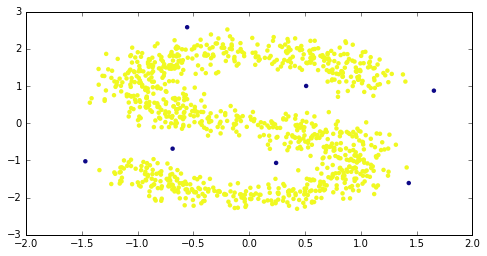

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


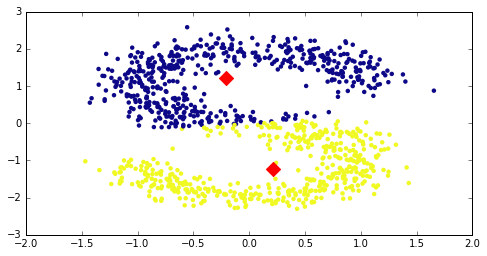

In [70]:
# make_s_curve
X, t = datasets.make_s_curve(n_samples = nsamples, noise = 0.2)
X = X[:,[0,2]]

dbscan_model = DBSCAN(eps=0.2, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 2)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

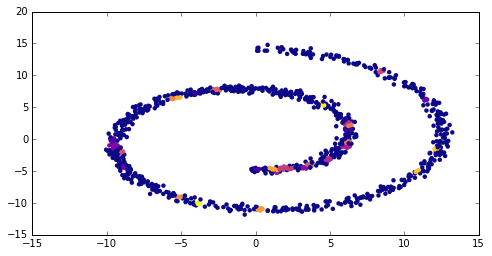

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


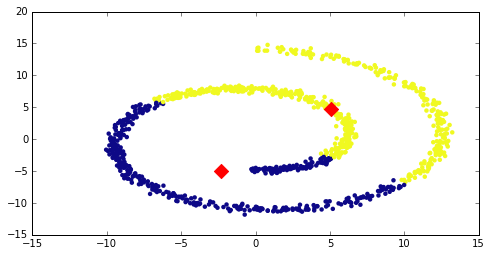

In [71]:
# make_swiss_roll
X, t = datasets.make_swiss_roll(n_samples = nsamples, noise = 0.3)
X = X[:,[0,2]]

dbscan_model = DBSCAN(eps=0.2, min_samples=5)
dbscan_model = dbscan_model.fit(X)

kmeans_model = KMeans(n_clusters = 2)
kmeans_model = kmeans_model.fit(X)

plot_clustering(X, dbscan_model.labels_)
plot_clustering(X, kmeans_model.labels_, kmeans_model.cluster_centers_)

Some code and ideas based on:

- https://mubaris.com/posts/kmeans-clustering/
- https://www.kaggle.com/andyxie/k-means-clustering-implementation-in-python
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


### End.